To open on Google Colab\
https://colab.research.google.com/github/RodrigoAVargasHdz/CHEM-4PB3/blob/main/Course_Notes/Week4/probabilistic_regression.ipynb

In [3]:
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF


import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML, Image  # For GIF
import os


# Generate random data

$f(x) = \sin(x) + x -1 + {\cal u}_i$\
where,\
${\cal u}_i \sim {\cal U}([0,0.5])$


In [83]:
# generate random data over f(x) = sin(x) + x - 1
def get_data(N):
    # x = np.linspace(-1.,1.,N)
    x = np.random.uniform(low = -1.,high=1.,size=N)
    y = np.sin(.5*x) + x -1.
    y = y + np.random.uniform(low = 0.,high=1.5,size=x.shape)
    X_w_ones = np.column_stack((x,np.ones_like(x)))
    return X_w_ones,y

In [84]:

def posterior_distribution(data,l=.001):
    Xtr,ytr = data # training data
    l_I = l**2 * np.eye(Xtr.shape[1], Xtr.shape[1])
    A = l_I + Xtr.T @ Xtr
    A_inv = np.linalg.inv(A)
    
    mean = A_inv @ (Xtr.T @ ytr)
    sigma = A_inv
    return mean, sigma    

In [102]:
# generate data
n_points = 10
data = get_data(n_points)

Text(0, 0.5, '$f(x)$')

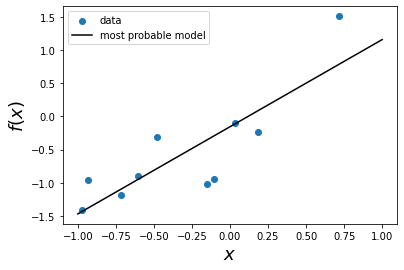

In [103]:
x_grid = np.linspace(-1., 1., 100)
X_grid = np.column_stack((x_grid,np.ones_like(x_grid)))

plt.scatter(data[0][:,0],data[1],label='data')

mean,_ = posterior_distribution(data)
y_pred = X_grid @ mean
plt.plot(x_grid,y_pred,c='k',label='most probable model')

plt.legend()
plt.xlabel(r'$x$', fontsize=18)
plt.ylabel(r'$f(x)$', fontsize=18)


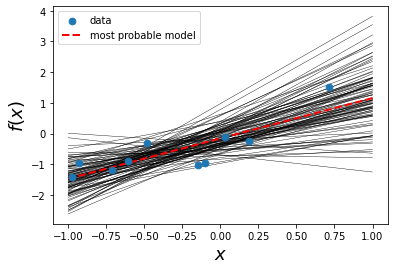

In [106]:
mean,std = posterior_distribution(data)
random_theta = np.random.multivariate_normal(mean,std,100)

plt.figure(0)
plt.scatter(data[0][:,0],data[1],label='data',zorder=3.5,s=45)
plt.plot(x_grid, X_grid @ mean, c='r',
         label='most probable model', ls='--',lw=2., zorder=2.5)
for t  in random_theta:
    y_pred = X_grid @ t
    plt.plot(x_grid,y_pred,c='k',lw=0.4)

plt.legend()
plt.xlabel(r'$x$', fontsize=18)
plt.ylabel(r'$f(x)$', fontsize=18)
plt.savefig('Figures/posterior_samples.png', dpi=1200)


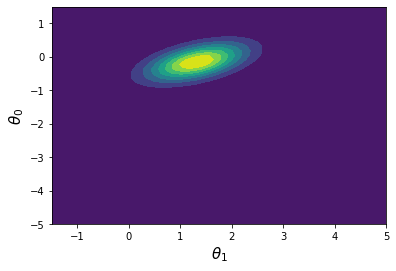

In [107]:
from scipy.stats import multivariate_normal
theta1, theta0 = np.meshgrid(
    np.linspace(-1.5, 5, 50), np.linspace(-5,1.5 , 50))
pos = np.empty(theta0.shape + (2,))
pos[:, :, 0] = theta1; pos[:, :, 1] = theta0
rv = multivariate_normal(mean=mean, cov=std)

plt.contourf(theta1, theta0, rv.pdf(pos))
plt.xlabel(R'$\theta_1$',fontsize=15)
plt.ylabel(R'$\theta_0$', fontsize=15)
plt.savefig('Figures/posterior_pdf.png', dpi=1200)


In [108]:
import pandas as pd

In [109]:
data_N2 = pd.read_csv('nitrogen')
print(data_N2)



           R      Energy
0   0.750000 -108.594499
1   0.802083 -108.910707
2   0.854167 -109.126871
3   0.906250 -109.270740
4   0.958333 -109.362361
5   1.010417 -109.416255
6   1.062500 -109.443004
7   1.114583 -109.450384
8   1.166667 -109.443958
9   1.218750 -109.428287
10  1.270833 -109.406531
11  1.322917 -109.381006
12  1.375000 -109.353389
13  1.427083 -109.324864
14  1.479167 -109.296247
15  1.531250 -109.268081
16  1.583333 -109.240714
17  1.635417 -109.214355
18  1.687500 -109.188643
19  1.739583 -109.164602
20  1.791667 -109.141745
21  1.843750 -109.120059
22  1.895833 -109.099516
23  1.947917 -109.080078
24  2.000000 -109.061708
